In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# central limit theorem

The central limit theorem states that the sum of a number of random variables with finite variances will tend to a normal distribution as the number of variables grows. 

In [2]:
import random

from scipy.stats import norm

In [3]:
def sum_urv(nsum):
    N = 100000
    R=[]
    for i in range(N):
        temp=0
        for i in range(nsum):
            temp+=random.random()*2-1
        R+=[temp]
    sdev_sum = 2/np.sqrt(12)*np.sqrt(nsum)
    x = np.linspace(-sdev_sum*5, +sdev_sum*5, 100)
    plt.hist(R, bins=200, density=True, histtype='step', label=f'sum of {nsum} u.r.v.')
    plt.plot(x, norm.pdf(x, loc=0, scale=sdev_sum))
    plt.xlabel('r')
    plt.legend()
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\utente\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

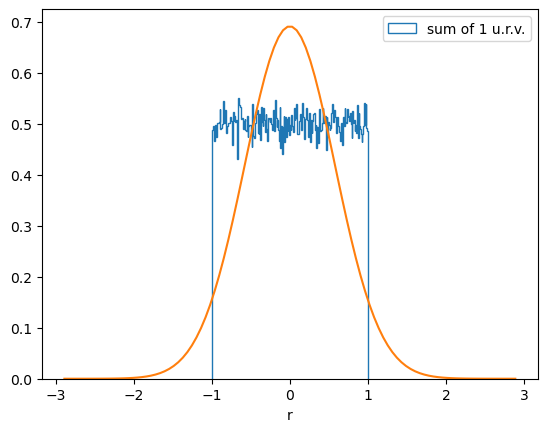

In [4]:
sum_urv(1)

<module 'matplotlib.pyplot' from 'C:\\Users\\utente\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

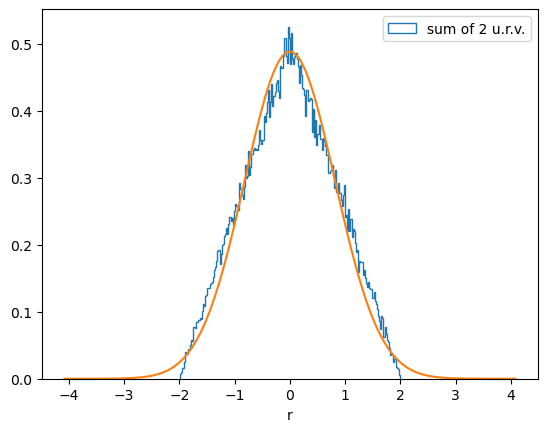

In [5]:
sum_urv(2)

<module 'matplotlib.pyplot' from 'C:\\Users\\utente\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

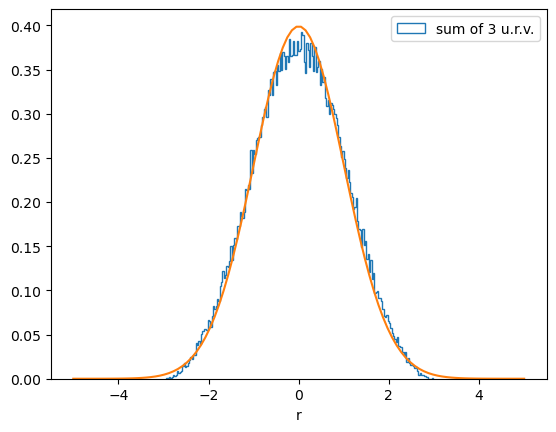

In [55]:
sum_urv(3)

<module 'matplotlib.pyplot' from 'C:\\Users\\utente\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

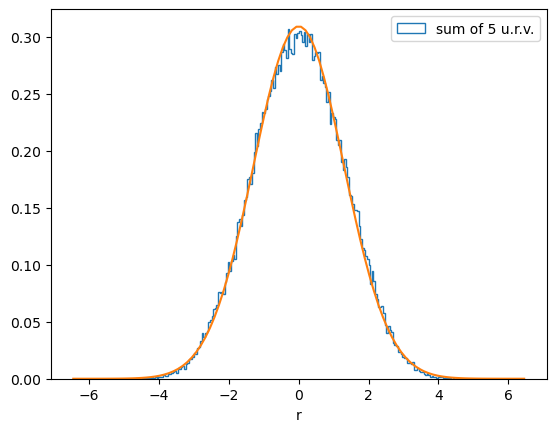

In [56]:
sum_urv(5)

<module 'matplotlib.pyplot' from 'C:\\Users\\utente\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

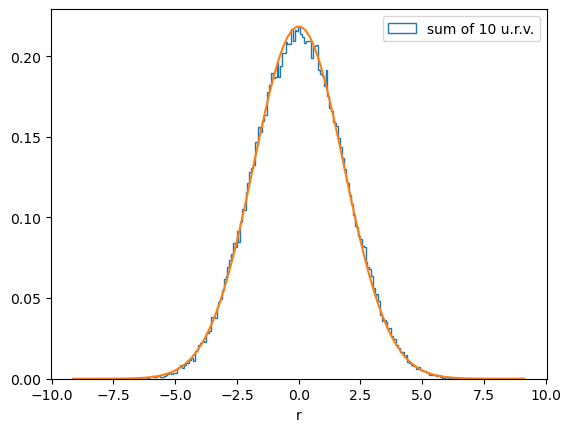

In [57]:
sum_urv(10)

# more on convolution

In [3]:
def exp(x):
    y = 2*np.exp(-2*x)*(x>=0) + 0*(x<0)
    return y

sigma = .5
def gaussian(y):
    return 1/math.sqrt(2*math.pi)/sigma*np.exp(-y**2/2/sigma**2)
f = exp
g = gaussian

In [4]:
xs = np.linspace(-0, 8, 81)
yfs = f(xs)
yfs/=yfs.sum()

ygs = g(xs)
ygs/=ygs.sum()


In [5]:
zs = np.linspace(-0, 8, 81)
ycs = np.convolve(g(zs), yfs, 'same')
ycs/=ycs.sum()

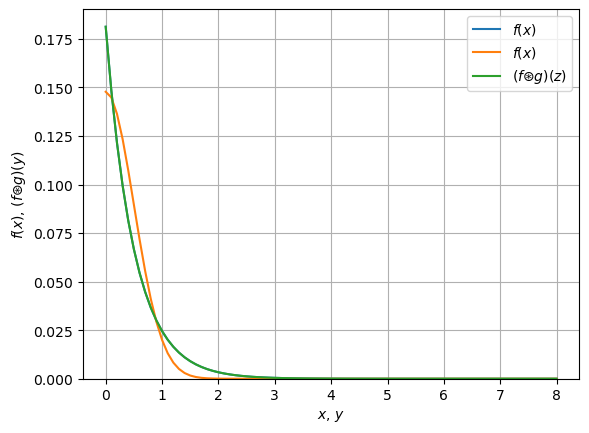

In [6]:
plt.plot(xs, yfs, label='$f(x)$')
plt.plot(xs, ygs, label='$f(x)$')
plt.plot(xs, ycs, label='$(f\circledast g)(z)$')
plt.xlabel('$x$, $y$')
plt.ylabel('$f(x)$, $(f\circledast g)(y)$')
plt.ylim(0)
plt.legend()
plt.grid()
plt.show()

In [7]:
N=100000
x = np.random.normal(loc=0, scale=1, size=N)
y = np.random.exponential(scale=1, size=N)

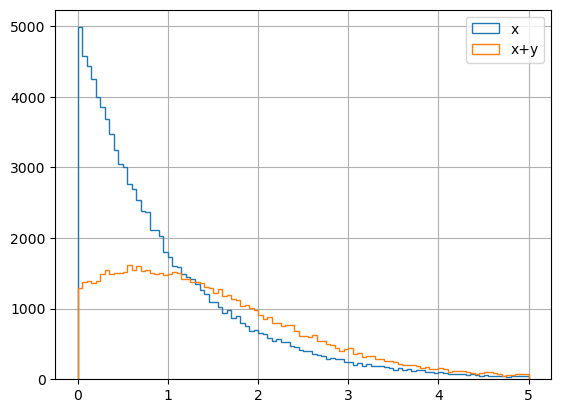

In [8]:
s = x+y
plt.hist(y, range=[0, 5], bins=100, histtype='step', label='x')
plt.hist(s, range=[0, 5], bins=100, histtype='step', label='x+y')
plt.legend()
plt.grid()
plt.show()


In [9]:
def u(x):
    return np.array([(1.0 if (-5<xx and xx<5) else 0.0) for xx in x])

In [10]:
xs = np.linspace(-10, 10, 201)
ys=u(xs)
ys/=ys.sum()
ycs = np.convolve(ys, ys, 'same')
ycs/=ycs.sum()

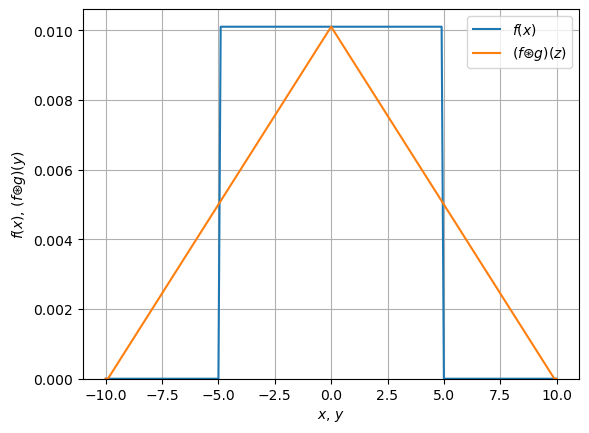

In [11]:
plt.plot(xs, ys, label='$f(x)$')
plt.plot(xs, ycs, label='$(f\circledast g)(z)$')
plt.xlabel('$x$, $y$')
plt.ylabel('$f(x)$, $(f\circledast g)(y)$')
plt.ylim(0)
plt.legend()
plt.grid()
plt.show()

In [12]:
x = np.random.uniform(-5, 5, size=N)
y = np.random.uniform(-5, 5, size=N)
s = x+y

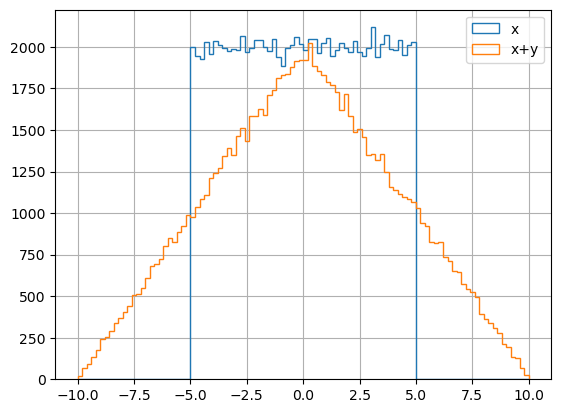

In [13]:
s = x+y
plt.hist(y, range=[-10, 10], bins=100, histtype='step', label='x')
plt.hist(s, range=[-10, 10], bins=100, histtype='step', label='x+y')
plt.legend()
plt.grid()
plt.show()
